# Laboratory Experiment 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

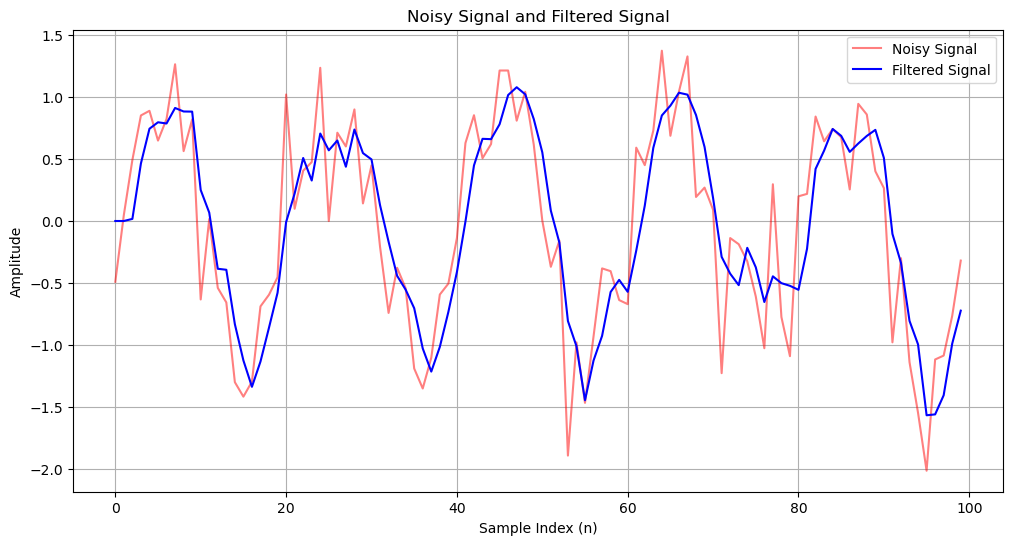

In [2]:
n_samples = 100
n = np.arange(n_samples)
clean_signal = np.sin(2 * np.pi * 0.05 * n)  # Clean sinusoidal signal
noise = np.random.normal(0, 0.5, n_samples)  # Random noise
noisy_signal = clean_signal + noise  # Noisy signal


def moving_average_filter(x, window_size=3):
    y = np.zeros_like(x)
    for n in range(window_size - 1, len(x)):
        y[n] = (x[n] + x[n-1] + x[n-2]) / window_size
    return y

filtered_signal = moving_average_filter(noisy_signal)


plt.figure(figsize=(12, 6))
plt.plot(n, noisy_signal, label='Noisy Signal', color='red', alpha=0.5)
plt.plot(n, filtered_signal, label='Filtered Signal', color='blue')
plt.title('Noisy Signal and Filtered Signal')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Problem 2

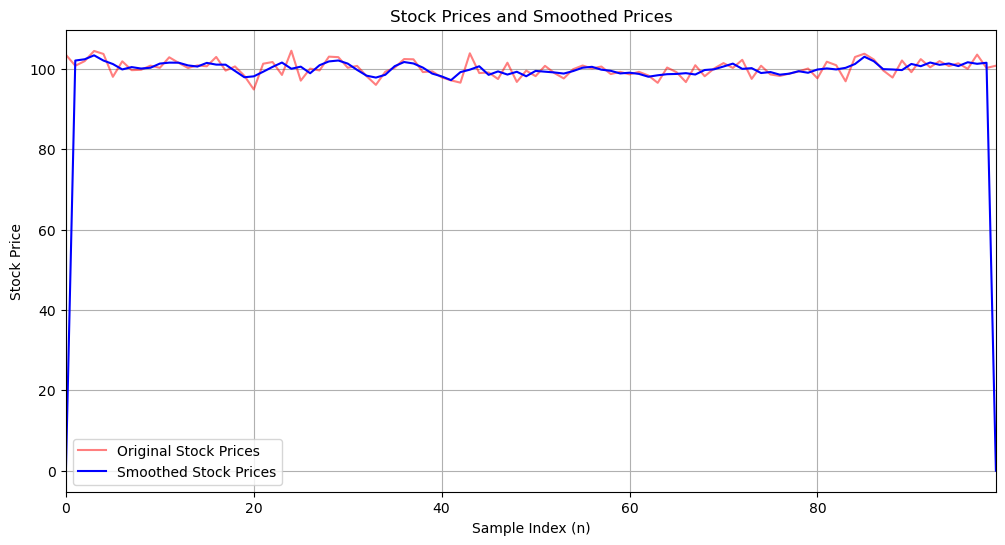

In [3]:
n_samples = 100
np.random.seed(0)  
base_price = 100
noise = np.random.normal(0, 2, n_samples)  # Random noise
stock_prices = base_price + noise  # Simulated stock prices

def non_causal_moving_average_filter(x, window_size=3):
    y = np.zeros_like(x)
    for n in range(1, len(x) - 1):
        y[n] = (x[n-1] + x[n] + x[n+1]) / window_size
    return y

smoothed_prices = non_causal_moving_average_filter(stock_prices)


n = np.arange(len(stock_prices)) 

plt.figure(figsize=(12, 6))
plt.plot(n, stock_prices, label='Original Stock Prices', color='red', alpha=0.5)
plt.plot(n, smoothed_prices, label='Smoothed Stock Prices', color='blue')
plt.title('Stock Prices and Smoothed Prices')
plt.xlabel('Sample Index (n)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.xlim(0, 99)  
plt.show()


## Problem 3

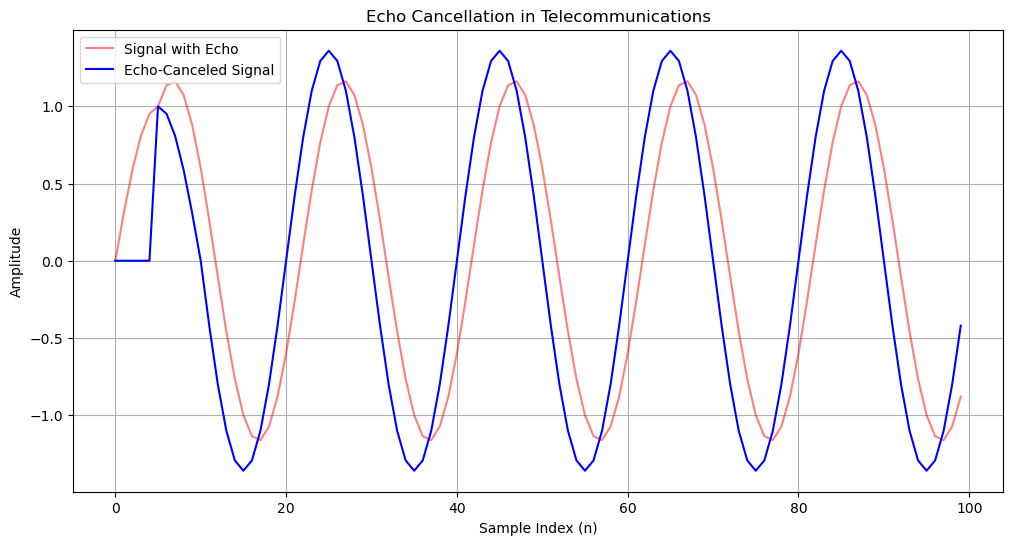

In [4]:
n_samples = 100
n = np.arange(n_samples)
original_signal = np.sin(2 * np.pi * 0.05 * n)  # Original sinusoidal signal

delay = 5
attenuation = 0.6
echo_signal = np.zeros_like(original_signal)
echo_signal[delay:] = original_signal[:-delay] * attenuation

# Signal with echo
signal_with_echo = original_signal + echo_signal

def echo_cancellation(x, d, a):
    y = np.zeros_like(x)
    for n in range(d, len(x)):
        y[n] = x[n] - a * x[n-d]
    return y

echo_canceled_signal = echo_cancellation(signal_with_echo, delay, attenuation)

plt.figure(figsize=(12, 6))
plt.plot(n, signal_with_echo, label='Signal with Echo', color='red', alpha=0.5)
plt.plot(n, echo_canceled_signal, label='Echo-Canceled Signal', color='blue')
plt.title('Echo Cancellation in Telecommunications')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()
